
# <center> Escuela Politécnica Nacional </center>

**Nombre:** Francisco Ulloa<br>
**Fecha:** Quito, 21 de enero de 2026<br>
**Tema:** Gauss-Jacobi Gauss Seidel <br>
**Repositorio:**<br>
https://github.com/Fu5CHAR/Metodos_numericos_2025B_Ulloa-Francisco/tree/main

In [17]:
import numpy as np

def seidel_modificado(A, b, X0, TOL=1e-6, N=100):
    """
    Método de Gauss-Seidel para resolver sistemas lineales Ax = b
    
    Parámetros:
    A: matriz de coeficientes
    b: vector de términos independientes
    X0: vector inicial
    TOL: tolerancia para la convergencia
    N: número máximo de iteraciones
    
    Retorna:
    Array con el historial de iteraciones o mensaje de error
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    X0 = np.array(X0, dtype=float)

    n = len(b)

    # Historial de iteraciones (iteración 0)
    tabla = [X0.copy()]

    # Verificación previa (iteraciones = 0)
    if np.all(np.abs(A @ X0 - b) < TOL):
        print('Número de iteraciones: 0')
        return np.array(tabla)

    k = 1
    x = X0.copy()  # Hacemos una copia para trabajar

    while k <= N:
        x_nuevo = x.copy()  # Copia del vector actual
        
        for i in range(n):
            # Suma para los elementos ya calculados en esta iteración (j < i)
            suma1 = 0.0
            for j in range(i):
                suma1 += A[i, j] * x_nuevo[j]
            
            # Suma para los elementos aún no actualizados (j > i)
            suma2 = 0.0
            for j in range(i + 1, n):
                suma2 += A[i, j] * x[j]
            
            # Actualización Gauss-Seidel
            x_nuevo[i] = (b[i] - suma1 - suma2) / A[i, i]

        tabla.append(x_nuevo.copy())

        # Condición de convergencia
        if np.all(np.abs(x_nuevo - x) < TOL):
            print('Número de iteraciones (Seidel):', k)
            return np.array(tabla)

        x = x_nuevo.copy()  # Actualizamos para la siguiente iteración
        k += 1

    print('Número máximo de iteraciones excedido (Seidel)')
    return "Número máximo de iteraciones excedido"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, X0, TOL=1e-6, N=100):

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    X0 = np.array(X0, dtype=float)

    n = len(b)
    k = 1

    # Historial de iteraciones
    tabla = [X0.copy()]

    while k <= N:
        x = np.zeros(n)

        # Paso 3
        for i in range(n):
            suma = 0.0
            for j in range(n):
                if j != i:
                    suma += A[i, j] * X0[j]

            x[i] = (b[i] - suma) / A[i, i]

        # Guardar iteración completa
        tabla.append(x.copy())

        # Paso 4: condición componente a componente
        if np.all(np.abs(x - X0) < TOL):
            tabla = np.array(tabla)

            print('Número de iteraciones:', k)
            print(tabla)
            return tabla

        # Paso 5 y 6
        X0 = x.copy()
        k += 1

    return "Número máximo de iteraciones excedido"


**1. Grafique la trayectoria de los siguientes sistemas de ecuaciones**

1
$$
\begin{matrix}
x_1 & +x_2 & =7\\
-2x_1 & +5x_2 & =0
\end{matrix}
\\
x_0 = (0,0)\\
x_0 = (5,2)
$$

Número de iteraciones: 36
[[0.         0.        ]
 [7.         0.        ]
 [7.         2.8       ]
 [4.2        2.8       ]
 [4.2        1.68      ]
 [5.32       1.68      ]
 [5.32       2.128     ]
 [4.872      2.128     ]
 [4.872      1.9488    ]
 [5.0512     1.9488    ]
 [5.0512     2.02048   ]
 [4.97952    2.02048   ]
 [4.97952    1.991808  ]
 [5.008192   1.991808  ]
 [5.008192   2.0032768 ]
 [4.9967232  2.0032768 ]
 [4.9967232  1.99868928]
 [5.00131072 1.99868928]
 [5.00131072 2.00052429]
 [4.99947571 2.00052429]
 [4.99947571 1.99979028]
 [5.00020972 1.99979028]
 [5.00020972 2.00008389]
 [4.99991611 2.00008389]
 [4.99991611 1.99996645]
 [5.00003355 1.99996645]
 [5.00003355 2.00001342]
 [4.99998658 2.00001342]
 [4.99998658 1.99999463]
 [5.00000537 1.99999463]
 [5.00000537 2.00000215]
 [4.99999785 2.00000215]
 [4.99999785 1.99999914]
 [5.00000086 1.99999914]
 [5.00000086 2.00000034]
 [4.99999966 2.00000034]
 [4.99999966 1.99999986]]
Número de iteraciones: 36
[[0.         0.       

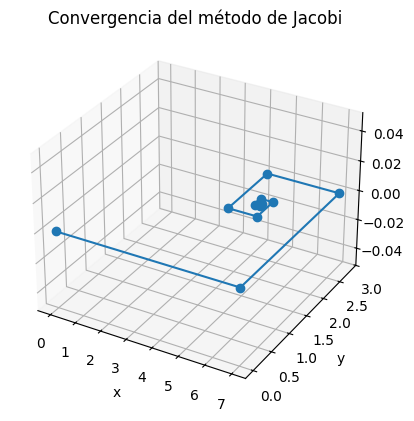

In [6]:

import numpy as np
import matplotlib.pyplot as plt
S1 = [[1,1],[-2,5]]
b1=[7,0]
x01=[0,0]
jacobi(S1,b1,x01)
tabla=jacobi(S1,b1,x01)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Convergencia del método de Jacobi')
plt.show()


Número de iteraciones (Seidel): 19


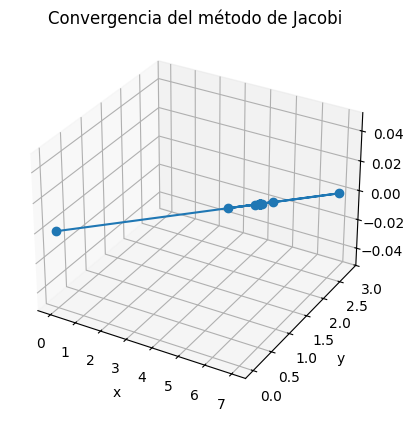

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,5.]]
b1=[7.,0.]
x01=[0.,0.]

resultado = seidel_modificado(S1,b1,x01)

if isinstance(resultado, str):
    print(resultado)  
else:
    tabla = resultado
   
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Convergencia del método de Jacobi')
plt.show()



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_modificado(A, b, X0, TOL=1e-6, N=100):

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    X0 = np.array(X0, dtype=float)

    n = len(b)

    # Historial de iteraciones (iteración 0)
    tabla = [X0.copy()]

    # 🔹 Verificación previa (iteraciones = 0)
    if np.all(np.abs(A @ X0 - b) < TOL):
        print('Número de iteraciones: 0')
        return np.array(tabla)

    k = 1

    while k <= N:
        x = np.zeros(n)

        # Paso 3
        for i in range(n):
            suma = 0.0
            for j in range(n):
                if j != i:
                    suma += A[i, j] * X0[j]

            x[i] = (b[i] - suma) / A[i, i]

        tabla.append(x.copy())

        # Paso 4: condición componente a componente
        if np.all(np.abs(x - X0) < TOL):
            print('Número de iteraciones:', k - 1)
            return np.array(tabla)

        X0 = x.copy()
        k += 1

    return "Número máximo de iteraciones excedido"


Número de iteraciones: 0
Número de iteraciones: 0


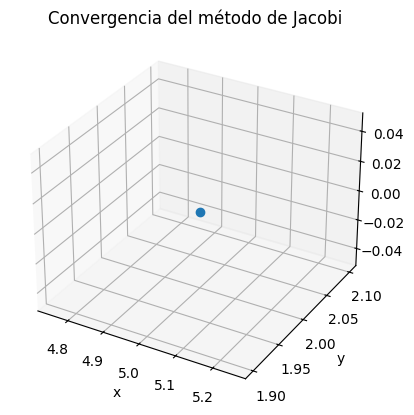

In [2]:

import numpy as np
import matplotlib.pyplot as plt

S1 = [[1,1],[-2,5]]
b1=[7,0]
x02=[5,2]
jacobi_modificado(S1,b1,x02)
tabla=jacobi_modificado(S1,b1,x02)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Convergencia del método de Jacobi')
plt.show()

Número de iteraciones: 0


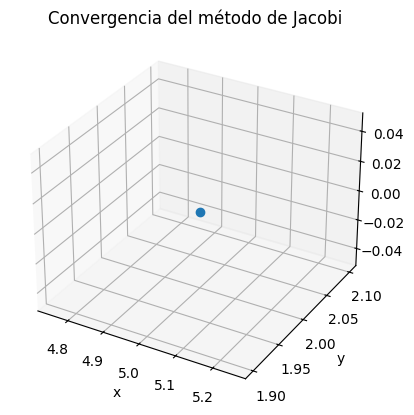

In [21]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,5.]]
b1=[7.,0.]
x01=[5.,2.]

resultado = seidel_modificado(S1,b1,x01)

if isinstance(resultado, str):
    print(resultado)  
else:
    tabla = resultado
   
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Convergencia del método de Jacobi')
plt.show()



**1. Grafique la trayectoria de los siguientes sistemas de ecuaciones**

2
$$
\begin{matrix}
x_1 & +x_2 & =6\\
-2x_1 & +1x_2 & =0
\end{matrix}
\\
x_0 = (0,0)\\
x_0 = (5,2)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,1.]]
b1=[6.,0.]
x01=[0.,0.]

resultado = jacobi_modificado(S1,b1,x01)

if isinstance(resultado, str):
    print(resultado)  
else:
    tabla = resultado
   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(tabla[:, 0], tabla[:, 1], marker='o', linestyle='-')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Convergencia del método de Jacobi')
    plt.show()

Número máximo de iteraciones excedido


In [23]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,1.]]
b1=[6.,0.]
x01=[0.,0.]

resultado = seidel_modificado(S1,b1,x01)

if isinstance(resultado, str):
    print(resultado)  
else:
    tabla = resultado
   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Convergencia del método de Seidel')
    plt.show()



Número máximo de iteraciones excedido (Seidel)
Número máximo de iteraciones excedido


In [16]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,1.]]
b1=[6.,0.]
x01=[5.,2.]

resultado = jacobi_modificado(S1,b1,x01)

# Verificar si el resultado es la cadena de error
if isinstance(resultado, str):
    print(resultado)  # Solo muestra la cadena si es texto
else:
    tabla = resultado
    # Generar la gráfica
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(tabla[:, 0], tabla[:, 1], marker='o', linestyle='-')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Convergencia del método de Jacobi')
    plt.show()

Número máximo de iteraciones excedido


In [24]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1.,1.],[-2.,1.]]
b1=[6.,0.]
x01=[5.,2.]

resultado = seidel_modificado(S1,b1,x01)

if isinstance(resultado, str):
    print(resultado)  
else:
    tabla = resultado
   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(tabla[:, 0], tabla[:, 1],marker='o', linestyle='-')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Convergencia del método de Seidel')
    plt.show()



Número máximo de iteraciones excedido (Seidel)
Número máximo de iteraciones excedido


**3. Pruebe tres posiciones iniciales, encuentre una en la que diverge el sistema.**

$$
\begin{bmatrix}
1 &-1 &2 &0 \\
-1 &1 &-1 &3\\
2 &-1 &1 &-1 \\
0 &3 &-1 &2
\end{bmatrix}

\begin{bmatrix}
1360\\ 1130 \\1350 \\3650
\end{bmatrix}
$$

In [35]:
import numpy as np

def seidel_modificado2(A, b, X0, TOL=1e-6, N=200):
    """
    Método de Gauss-Seidel para resolver sistemas lineales Ax = b
    
    Parámetros:
    A: matriz de coeficientes
    b: vector de términos independientes
    X0: vector inicial
    TOL: tolerancia para la convergencia
    N: número máximo de iteraciones
    
    Retorna:
    Array con el historial de iteraciones o mensaje de error
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    X0 = np.array(X0, dtype=float)

    n = len(b)

    # Historial de iteraciones (iteración 0)
    tabla = [X0.copy()]

    # Verificación previa (iteraciones = 0)
    if np.all(np.abs(A @ X0 - b) < TOL):
        print('Número de iteraciones: 0')
        return np.array(tabla)

    k = 1
    x = X0.copy()  # Hacemos una copia para trabajar

    while k <= N:
        x_nuevo = x.copy()  # Copia del vector actual
        
        for i in range(n):
            # Suma para los elementos ya calculados en esta iteración (j < i)
            suma1 = 0.0
            for j in range(i):
                suma1 += A[i, j] * x_nuevo[j]
            
            # Suma para los elementos aún no actualizados (j > i)
            suma2 = 0.0
            for j in range(i + 1, n):
                suma2 += A[i, j] * x[j]
            
            # Actualización Gauss-Seidel
            x_nuevo[i] = (b[i] - suma1 - suma2) / A[i, i]

        tabla.append(x_nuevo.copy())

        # Condición de convergencia
        if np.all(np.abs(x_nuevo - x) < TOL):
            print('Número de iteraciones (Seidel):', k)
            return np.array(tabla)

        x = x_nuevo.copy()  # Actualizamos para la siguiente iteración
        k += 1

    print('Número máximo de iteraciones excedido (Seidel)')
    return "Número máximo de iteraciones excedido"

In [41]:
def seidel_modificado_grande(A, b, X0, TOL=1e-6, N=10000):  # ¡10,000 iteraciones!
    """
    Método de Gauss-Seidel con más iteraciones
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(X0, dtype=float)

    n = len(b)
    tabla = [x.copy()]

    # Verificación previa
    if np.all(np.abs(A @ x - b) < TOL):
        print('Número de iteraciones (Seidel): 0')
        return np.array(tabla)

    k = 1
    while k <= N:
        x_nuevo = x.copy()
        
        for i in range(n):
            suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_nuevo[i] = (b[i] - suma) / A[i, i]

        tabla.append(x_nuevo.copy())

        if np.all(np.abs(x_nuevo - x) < TOL):
            print('Número de iteraciones (Seidel):', k)
            return np.array(tabla)

        x = x_nuevo.copy()
        k += 1

    print(f'Número máximo de iteraciones excedido ({N} iteraciones)')
    # Devolvemos lo que tenemos hasta ahora
    return np.array(tabla)



In [42]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1,-1,2,0],[-1.,1.,-1,3],[2,-1,1,-1],[0,3,-1,2]]
b1=[1360,1130,1350,3650]
x01 = [100., 200., 300., 400.]

seidel_modificado_grande(S1,b1,x01)


Número máximo de iteraciones excedido (10000 iteraciones)


C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: overflow encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])
C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: invalid value encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])


array([[ 100.,  200.,  300.,  400.],
       [ 960., 1190., 1020.,  550.],
       [ 510., 1010., 1890., 1255.],
       ...,
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan]], shape=(10001, 4))

In [43]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1,-1,2,0],[-1.,1.,-1,3],[2,-1,1,-1],[0,3,-1,2]]
b1=[1360,1130,1350,3650]
x02 = [10000., -5000., 20000., -15000.]
seidel_modificado_grande(S1,b1,x02)

Número máximo de iteraciones excedido (10000 iteraciones)


C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: overflow encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])
C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: invalid value encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])


array([[  10000.,   -5000.,   20000.,  -15000.],
       [ -43640.,   22490.,   96120.,   16150.],
       [-168390., -119590.,  234690.,  298555.],
       ...,
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan]], shape=(10001, 4))

In [44]:
import numpy as np
import matplotlib.pyplot as plt

S1 = [[1,-1,2,0],[-1.,1.,-1,3],[2,-1,1,-1],[0,3,-1,2]]
b1=[1360,1130,1350,3650]
x03 = [0., 0., 0., 0.]
seidel_modificado_grande(S1,b1,x03)

Número máximo de iteraciones excedido (10000 iteraciones)


C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: overflow encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])
C:\Users\pc\AppData\Local\Temp\ipykernel_12032\2547954742.py:23: RuntimeWarning: invalid value encountered in dot
  suma = np.dot(A[i, :i], x_nuevo[:i]) + np.dot(A[i, i+1:], x[i+1:])


array([[    0.,     0.,     0.,     0.],
       [ 1360.,  2490.,  1120., -1350.],
       [ 1610.,  7910.,  4690., -7695.],
       ...,
       [   nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan]], shape=(10001, 4))

Dado que el sistema no es diagonal dominante, no está garantizada su convergencia.